Combined Cycle Power Plant

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('data\cycle_power_plant.csv')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

defining x and y

In [4]:
x=df.drop('PE',axis=1).values
y=df['PE'].values
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


split train and test data

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_pred)
pred=lr.predict([[14.96,41.76,1024.07,73.17]])#for first sample of data
print(pred)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]
[467.34820092]


Evaluate

In [6]:
r2_score(y_test,y_pred)

0.9304112159477683

Plots

Text(0.5, 1.0, 'actual v/s predicted')

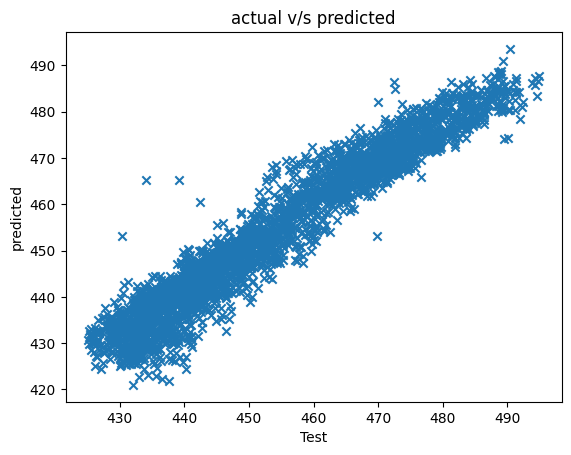

In [7]:
plt.scatter(y_test,y_pred,marker='x')
plt.xlabel('Test')
plt.ylabel('predicted')
plt.title('actual v/s predicted')

In [8]:
data=pd.DataFrame({'actual':y_test,'predicted':y_pred,'diffrence':y_pred-y_test})
print(data[0:20])#printing 20 values

    actual   predicted  diffrence
0   431.23  431.402451   0.172451
1   460.01  458.614741  -1.395259
2   461.14  462.819674   1.679674
3   445.90  448.601237   2.701237
4   451.29  457.879479   6.589479
5   432.68  429.676856  -3.003144
6   477.50  473.017115  -4.482885
7   459.68  456.532373  -3.147627
8   477.50  474.342524  -3.157476
9   444.99  446.364396   1.374396
10  444.37  441.946411  -2.423589
11  437.04  441.452599   4.412599
12  442.34  444.746375   2.406375
13  440.74  440.874598   0.134598
14  436.55  438.374490   1.824490
15  460.24  454.370315  -5.869685
16  448.66  444.904201  -3.755799
17  432.94  437.370808   4.430808
18  452.82  451.306760  -1.513240
19  432.20  427.453009  -4.746991


In [9]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000
